## Separa os dados em treino e teste, treina os modelos, faz os testes, verifica os resultados e escolhe o modelo que ficou com os resultados de suas métricas mais adequados

In [177]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn import svm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [178]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_supermarket_sales.csv')

In [179]:
# verifica os dados
dfx.head(3)

,id_fatura,filial,cidade,tipo_cliente,genero,linha_produto,preco_unitario,qtde,imposto,total_preco,moeda,custo,margem_bruta,receita_bruta,experiencia_cliente,data_hora,dia_semana,feriado,hora,filial_nro,tipo_cliente_nro,genero_nro,linha_produto_nro,moeda_nro
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00,1,0,10,0,1,1,5,1
1,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,Credit card,846.30,4.761905,42.315,9.0,2019-01-01 11:36:00,1,0,11,1,0,0,2,1
2,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00,1,0,11,2,0,0,5,2


In [180]:
# separa as variáveis: dependente_y x independentes_x
X = dfx[['preco_unitario', 'custo', 'imposto','dia_semana', 'feriado', 'tipo_cliente_nro', \
         'genero_nro', 'linha_produto_nro', 'moeda_nro']]
y = dfx[['qtde']]

In [181]:
# separa dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.70, random_state=42)

## Regressão Linear Múltipla

In [182]:
# treina e prediz quantidade de venda
regRLM = LinearRegression().fit(X_train, y_train)
y_pred = regRLM.predict(X_test)

In [183]:
# Avalia o modelo
print('coeficiente de determinação (score)', rlm.score(X_train, y_train))
print('coeficiente de determinação r2_score', r2_score(y_test, y_pred))
print('erro médio absoluto', mean_absolute_error(y_test, y_pred))
print('erro quadrático médio', mean_squared_error(y_test,y_pred))

coeficiente de determinação (score) 0.819868454108158
coeficiente de determinação r2_score 0.8033269121521436
erro médio absoluto 0.9211225794092502
erro quadrático médio 1.6071306578881377


## Árvore de Regressão

In [184]:
# Cria o regressor
regTree = tree.DecisionTreeRegressor(random_state=2)

In [185]:
# Faz o fit, treina o modelo
Dtree_model = regTree.fit(X_train, y_train)

In [186]:
# Avalia o modelo
y_predTree = Dtree_model.predict(X_test)

print('coeficiente de determinação (score)', Dtree_model.score(X_test, y_test))
print('coeficiente de determinação r2_score', r2_score(y_test, y_predTree))
print('erro médio absoluto', mean_absolute_error(y_test, y_predTree))
print('erro médio quadrático', mean_squared_error(y_test,y_predTree)) 

coeficiente de determinação (score) 0.9691614257407132
coeficiente de determinação r2_score 0.9691614257407132
erro médio absoluto 0.228
erro médio quadrático 0.252


## SVR

In [187]:
# Cria o regressor
regSVR = svm.SVR()

In [188]:
# Faz o fit, treina o modelo
SVR_model = regSVR.fit(X_train, y_train)

In [189]:
# Avalia o modelo
y_predSVR = SVR_model.predict(X_test)

print('coeficiente de determinação (score)', regSVR.score(X_test, y_test))
print('coeficiente de determinação r2_score', r2_score(y_test, y_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto', mean_absolute_error(y_test, y_predSVR))
print('erro médio quadrático', mean_squared_error(y_test,y_predSVR))

coeficiente de determinação (score) 0.8434435184006899
coeficiente de determinação r2_score 0.8434435184006899
erro médio absoluto 0.756273145010852
erro médio quadrático 1.2793144401332168


## Visualiza as Informações

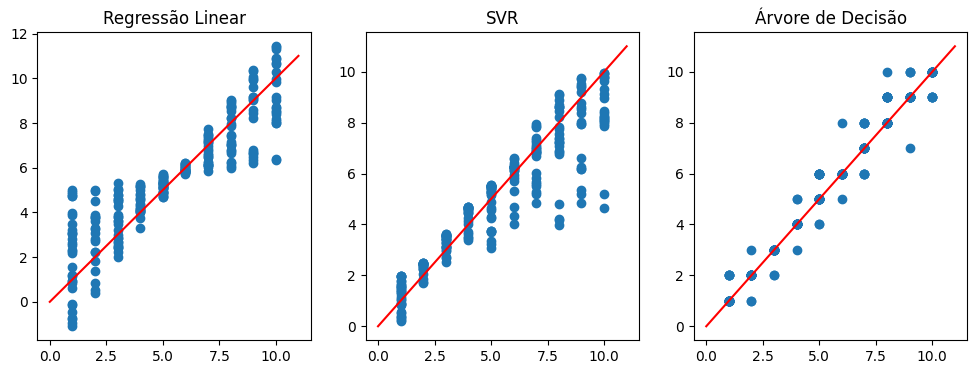

In [199]:
# Plota gráficos de regressão linear dos testes
import numpy as np
fig,ax = plt.subplots(ncols=3,figsize=(12,4))

x = np.arange(0,12)
y = x
ax[0].scatter(y_test,y_pred)
ax[0].plot(x,y,'r')
ax[0].set_title('Regressão Linear')

ax[1].scatter(y_test,y_predSVR)
ax[1].plot(x,y,'r')
ax[1].set_title('SVR')

ax[2].scatter(y_test,y_predTree)
ax[2].plot(x,y,'r')
ax[2].set_title('Árvore de Decisão')

plt.show()